# Use the data from June to predict August

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [3]:
df = pd.read_csv(r'C:\Users\Kun\Downloads\cinderella_2022_06_07_08\month_6.csv')
df.head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_8872\2163496995.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Kun\Downloads\cinderella_2022_06_07_08\month_6.csv')


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,20073,2022-06-02 18:27:21.000,0.0,0.0,59.331673,18.079117,5749.6315,283.7917,2.41,2.16,...,unknown,NaN,1,NaN,NaN,2,d047b2b9-4e95-491b-aab8-2f87709b8f66,0.0,297.219925,1.654179e+09
1,20074,2022-06-02 18:27:21.300,0.0,0.0,59.331673,18.079116,5749.6315,283.7917,2.41,2.16,...,unknown,NaN,1,NaN,NaN,2,d047b2b9-4e95-491b-aab8-2f87709b8f66,0.0,297.225597,1.654179e+09
2,20075,2022-06-02 18:27:21.600,0.0,0.0,59.331673,18.079116,7069.7262,283.7917,2.21,2.16,...,unknown,NaN,1,NaN,NaN,2,d047b2b9-4e95-491b-aab8-2f87709b8f66,0.0,297.233299,1.654179e+09
3,20076,2022-06-02 18:27:21.900,0.0,0.0,59.331673,18.079116,7069.7262,278.7898,2.21,1.90,...,unknown,NaN,1,NaN,NaN,2,d047b2b9-4e95-491b-aab8-2f87709b8f66,0.0,297.241794,1.654179e+09
4,20077,2022-06-02 18:27:22.200,0.0,0.0,59.331673,18.079116,7069.7262,278.7898,2.21,1.90,...,unknown,NaN,1,NaN,NaN,2,d047b2b9-4e95-491b-aab8-2f87709b8f66,0.0,297.250562,1.654179e+09


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg'],
      dtype='object')


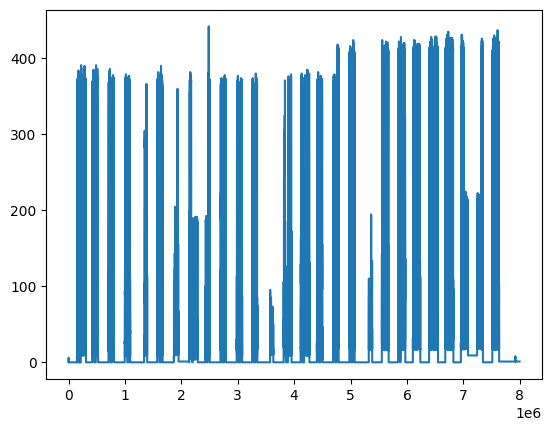

In [5]:
plt.plot(df.index, df.engineFuelRate)

In [6]:
df.describe()

,Unnamed: 0,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,engineTripFuel,...,courseHeadingDiff,distanceFromDock,legId,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,accumFuelLeg,accumDistLeg,accumTimeLeg
count,7.997219e+06,7.997219e+06,7.997219e+06,7.997219e+06,7.997219e+06,7.997219e+06,7.997211e+06,7.997219e+06,7.997211e+06,7.580756e+06,...,0.0,7.997219e+06,7.997219e+06,7.997219e+06,2.605524e+06,2.605524e+06,7.997219e+06,7.997219e+06,7.997219e+06,7.997219e+06
mean,4.018682e+06,5.316037e+01,4.277183e+02,5.933914e+01,1.823406e+01,7.283020e+02,1.998723e+02,4.466582e+00,6.235829e+00,1.481343e+06,...,NaN,7.095203e+02,6.057642e+02,5.677521e+01,4.235032e+03,4.158064e+03,1.256657e+04,1.636037e+01,3.078914e+03,4.679652e+07
std,2.308598e+06,1.186045e+02,6.785105e+02,3.311460e-02,2.851001e-01,2.791375e+03,8.554616e+01,4.585506e+00,7.889331e+00,2.386406e+05,...,NaN,2.206177e+03,3.855544e+02,3.320781e+01,5.394984e+03,4.924799e+03,8.560925e+03,4.168015e+01,8.091474e+03,2.742312e+08
min,2.007300e+04,0.000000e+00,0.000000e+00,5.928763e+01,1.758513e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.287110e+05,...,NaN,1.803952e-10,1.000000e+00,1.000000e+00,4.600474e-02,1.759757e-01,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01
25%,2.019378e+06,0.000000e+00,0.000000e+00,5.933163e+01,1.807912e+01,7.779620e+01,1.345935e+02,1.490000e+00,1.540000e+00,1.516034e+06,...,NaN,1.865654e+00,2.620000e+02,2.500000e+01,2.366407e+02,3.413027e+02,5.081000e+03,0.000000e+00,3.328339e+02,9.696000e+02
50%,4.018682e+06,0.000000e+00,0.000000e+00,5.933166e+01,1.807915e+01,1.837934e+02,1.946911e+02,2.770000e+00,2.820000e+00,1.524393e+06,...,NaN,3.590702e+00,5.510000e+02,5.100000e+01,2.636994e+03,2.702824e+03,1.083200e+04,1.402417e+00,1.065852e+03,6.701100e+03
75%,6.017986e+06,2.000000e+01,7.735000e+02,5.933169e+01,1.830907e+01,2.834938e+02,2.810931e+02,5.340000e+00,6.120000e+00,1.533200e+06,...,NaN,1.220602e+02,8.750000e+02,8.100000e+01,5.937127e+03,6.050908e+03,1.898300e+04,8.756833e+00,2.498043e+03,1.966680e+04
max,8.017291e+06,4.410000e+02,2.105500e+03,5.950202e+01,1.893325e+01,3.598920e+04,3.598920e+02,3.019000e+01,6.885000e+01,1.547243e+06,...,NaN,2.995565e+04,1.341000e+03,1.190000e+02,3.420325e+04,2.995565e+04,2.911000e+04,5.214160e+02,1.010967e+05,1.654287e+09


- Checking for missing values

In [7]:
df.engineFuelRate.isnull().sum(), df.engineSpeed.isnull().sum(), df.speedOverGround.isnull().sum()

(0, 0, 0)

-  Futures plots

[Text(0.5, 0, 'Engine Speed'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Engine Speed VS Fuel Rate')]

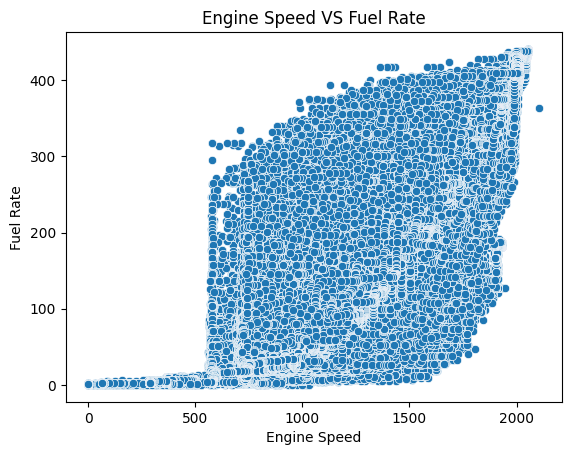

In [8]:
sns.scatterplot(data=df, x=df.engineSpeed, y=df.engineFuelRate).set(xlabel="Engine Speed", ylabel = "Fuel Rate", title= "Engine Speed VS Fuel Rate")

[Text(0.5, 0, 'Speed over ground'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Speed overground VS Fuel Rate')]

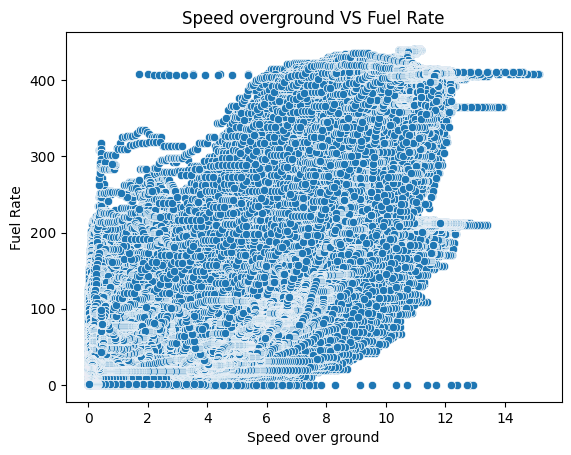

In [9]:
sns.scatterplot(data=df, x=df.speedOverGround, y=df.engineFuelRate).set(xlabel="Speed over ground", ylabel = "Fuel Rate", title= "Speed overground VS Fuel Rate")

- The engine fuel rate is close to zero when Engine Speed is lower than 550.
- Here we think of remove all the outliers before we make the model.

In [10]:
df = df.loc[df.engineSpeed > 550]
df.shape

(2553884, 49)

#### Defind fuel consumption based on every 0.3 second

In [11]:
df['FuelConsumption'] = df['engineFuelRate']*0.3/3600

In [12]:
df.FuelConsumption.info()

<class 'pandas.core.series.Series'>
Int64Index: 2553884 entries, 156 to 7635048
Series name: FuelConsumption
Non-Null Count    Dtype  
--------------    -----  
2553884 non-null  float64
dtypes: float64(1)
memory usage: 39.0 MB


In [13]:
X, y = df[["engineSpeed", "speedOverGround"]], df["FuelConsumption"]
X.head(5), y.head(5)

(     engineSpeed  speedOverGround
 156        594.0              0.0
 157        998.0              0.0
 158       1031.0              0.0
 159        976.0              0.0
 160        934.0              0.0,
 156    0.0
 157    0.0
 158    0.0
 159    0.0
 160    0.0
 Name: FuelConsumption, dtype: float64)

In [14]:
X.shape, y.shape

((2553884, 2), (2553884,))

## Modeling

### Data split

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1711102, 2), (1711102,), (421391, 2), (421391,), (421391, 2), (421391,))

#### Feature scaling/Feature standardization

- Normalization (min-max feature scaling)

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_val.min():.2f} ≤ scaled_X_train ≤ {scaled_X_val.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") 

0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_test ≤ 0.98


## Polynormial regression algorithm

### Compare with RMSE with different degrees

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_val = []

for degree in range(1,10):
    model_poly = PolynomialFeatures(degree, include_bias=False)

    train_features = model_poly.fit_transform(X_train) # find out the polynomial combinations on training data
    val_features = model_poly.transform(X_val) # find out the polynomial combinations on validation data
    model_lin_reg = LinearRegression() # regression model fit 

    model_lin_reg.fit(train_features, y_train) 

    y_pred_val = model_lin_reg.predict(val_features) # use the model from train data to predict Y on validation data
    
    MAE_val.append(mean_absolute_error(y_val, y_pred_val))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'MAE'),
 Text(0.5, 1.0, 'MAE on validation data for different degrees of polynomial')]

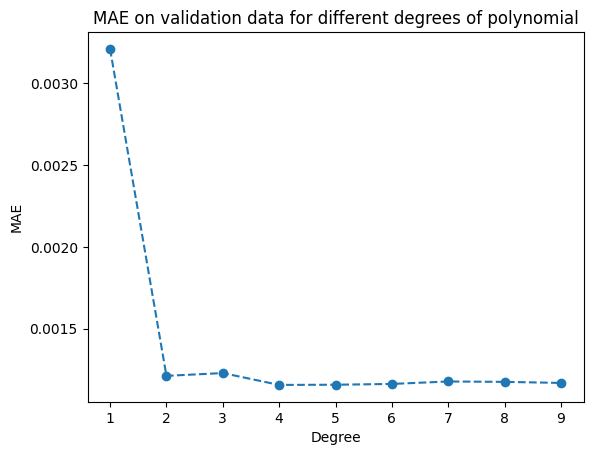

In [19]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), MAE_val[:10],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "MAE", title = "MAE on validation data for different degrees of polynomial")

In [22]:
poly_model_4 = PolynomialFeatures(4, include_bias=False)
X_train_features = poly_model_4.fit_transform(scaled_X_train)
print(X_train_features.shape)

model_poly = LinearRegression()
model_poly.fit(X_train_features, y_train)

(1711102, 14)


LinearRegression()

In [23]:
X_features_val_4_degree = poly_model_4.fit_transform(scaled_X_val)

model_poly.score(X_features_val_4_degree,y_val)

0.9674191280725691

In [24]:
X_features_test_4_degree = poly_model_4.fit_transform(scaled_X_test)
pred_poly_test = model_poly.predict(X_features_test_4_degree)

In [25]:
mae_Poly = mean_absolute_error(y_test, pred_poly_test)
mse_Poly = mean_squared_error(y_test, pred_poly_test)
rmse_Poly = np.sqrt(mse_Poly)

print(f"Polynormial, MAE: {mae_Poly:.7f}, MSE: {mse_Poly:.7f}, RMSE: {rmse_Poly:.7f}")

Polynormial, MAE: 0.0011589, MSE: 0.0000058, RMSE: 0.0024104


## KNN regression model

- evaluate the KNN model with different k

In [26]:
from sklearn import neighbors

mae_val = []
for K in range(15):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    model_knn.fit(scaled_X_train, y_train)  # fit the model
    pred=model_knn.predict(scaled_X_test) # make prediction on test set
    error = mean_absolute_error(y_test,pred) # calculate mae
    mae_val.append(error) # store mae values
    print('MAE value for k= ' , K , 'is:', error , 'Score(correlation) is:', model_knn.score(scaled_X_test, y_test))

MAE value for k=  1 is: 0.0006224164104385501 Score(correlation) is: 0.9824662395207076
MAE value for k=  2 is: 0.0005672940349804444 Score(correlation) is: 0.986647007206607
MAE value for k=  3 is: 0.0005446640313469755 Score(correlation) is: 0.9880943340294793
MAE value for k=  4 is: 0.0005325010525655904 Score(correlation) is: 0.9887636636104865
MAE value for k=  5 is: 0.0005243567369075803 Score(correlation) is: 0.989192025865241
MAE value for k=  6 is: 0.0005200525198423528 Score(correlation) is: 0.9894253277500883
MAE value for k=  7 is: 0.0005163816676236255 Score(correlation) is: 0.9895737120053568
MAE value for k=  8 is: 0.0005139301955375832 Score(correlation) is: 0.9896945210128423
MAE value for k=  9 is: 0.0005117079212757768 Score(correlation) is: 0.9897737265654927
MAE value for k=  10 is: 0.0005096097376176624 Score(correlation) is: 0.9898455621104193
MAE value for k=  11 is: 0.0005082136671263515 Score(correlation) is: 0.9898977378670581
MAE value for k=  12 is: 0.00050

<AxesSubplot:title={'center':'MAE vs k-values'}>

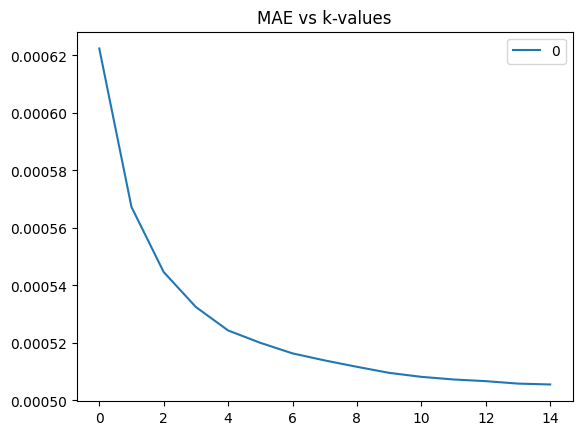

In [27]:
curve = pd.DataFrame(mae_val) 
curve.plot(title = "MAE vs k-values")

In [32]:
from sklearn import neighbors

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=6, weights='uniform')
knn_reg.fit(scaled_X_train, y_train)
knn_reg.score(scaled_X_val, y_val)

0.9893968639162772

In [33]:
pred_knn_test = knn_reg.predict(scaled_X_test)

In [34]:
mae_knn = mean_absolute_error(y_test, pred_knn_test)
mse_knn = mean_squared_error(y_test, pred_knn_test)
rmse_knn = np.sqrt(mse_knn)

print(f"KNN, MAE: {mae_knn:.7f}, MSE: {mse_knn:.7f}, RMSE: {rmse_knn:.7f}")

KNN, MAE: 0.0005201, MSE: 0.0000019, RMSE: 0.0013674


## GBDT

In [35]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

mae_val_tree = []

for d in range(10):
    d = d+1
    
    model_gbr= GBR(max_depth = d) 
    model_gbr.fit(X_train, y_train)  # fit the model
    pred = model_gbr.predict(X_test) # make prediction on test set
    error = mean_absolute_error(y_test,pred) # calculate mae
    mae_val_tree.append(error) # store mae values
    print('MAE value for max_depth= ' , d , 'is:', error , 'Score is:', model_gbr.score(X_test, y_test))

MAE value for max_depth=  1 is: 0.0008217347656905532 Score is: 0.9798327218690033
MAE value for max_depth=  2 is: 0.0006699974748037456 Score is: 0.9860004126012071
MAE value for max_depth=  3 is: 0.0006045925448994814 Score is: 0.9884229545290343
MAE value for max_depth=  4 is: 0.0005517681409827263 Score is: 0.9895563882002792
MAE value for max_depth=  5 is: 0.0005224251058546593 Score is: 0.9902811965652416
MAE value for max_depth=  6 is: 0.000508104231912867 Score is: 0.9906036744904074
MAE value for max_depth=  7 is: 0.0004990361727588697 Score is: 0.9907842740296056
MAE value for max_depth=  8 is: 0.0004957943947495977 Score is: 0.9908347649874998
MAE value for max_depth=  9 is: 0.0004914814176759013 Score is: 0.9909124419619606
MAE value for max_depth=  10 is: 0.00048813159966390164 Score is: 0.9909237692199833


<AxesSubplot:title={'center':'MAE vs max_depth'}>

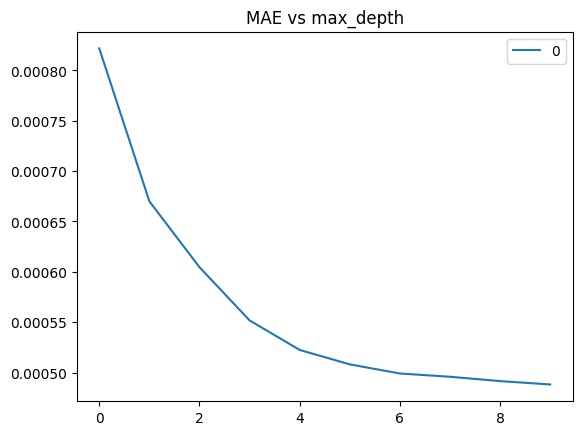

In [36]:
curve = pd.DataFrame(mae_val_tree) 
curve.plot(title = "MAE vs max_depth")

In [38]:
gbr = GBR(max_depth=7) 
# n_estimators=100, learning=0.1, max_deptht=7
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7)

In [39]:
gbr.score(X_val, y_val)

0.9908333888144063

In [40]:
y_gbr_pred = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_gbr_pred)
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting Regressor, MAE: {mae_gbr:.7f}, MSE: {mse_gbr:.7f}, RMSE: {rmse_gbr:.7f}")

Gradient Boosting Regressor, MAE: 0.0004990, MSE: 0.0000016, RMSE: 0.0012765


|      Models      |       MAE      |     Score (coefficient)    |
|-----------------|-----------------|---------------|
|           Polynormial Regression (degree = 4)     |         0.001159     |   0.967419 |
|             KNN (k = 7)   |         0.000520      |       0.989397        | 
|             GBR (max_depth = 7)   |         0.000499      |      0.990833   | 


## Use the model based on June to predict the consumptions in August

In [41]:
df_aug = pd.read_csv(r'C:\Users\Kun\Downloads\cinderella_2022_06_07_08\month_8.csv')
df_aug.head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_8872\634115604.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aug = pd.read_csv(r'C:\Users\Kun\Downloads\cinderella_2022_06_07_08\month_8.csv')


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,15525560,2022-08-01 00:00:00.000,0.0,0.0,59.331697,18.079136,97.6950,134.8972,3.54,3.80,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.031469,11100.0
1,15525561,2022-08-01 00:00:00.300,0.0,0.0,59.331697,18.079137,104.3929,140.0939,3.24,3.18,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.061336,11100.3
2,15525562,2022-08-01 00:00:00.600,0.0,0.0,59.331697,18.079137,104.3929,144.7922,3.24,3.24,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.089235,11100.6
3,15525563,2022-08-01 00:00:00.900,0.0,0.0,59.331697,18.079137,104.3929,144.7922,3.24,3.24,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.114853,11100.9
4,15525564,2022-08-01 00:00:01.200,0.0,0.0,59.331697,18.079137,105.9972,141.6925,3.24,3.18,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.137870,11101.2


### Data cleaning for June

In [42]:
df_aug = df_aug.loc[df_aug.engineSpeed > 550]
df_aug.shape

(694737, 49)

In [43]:
df_aug['FuelConsumption'] = df_aug['engineFuelRate']*0.3/3600

In [44]:
X_aug, y_aug = df_aug[["engineSpeed", "speedOverGround"]], df_aug["FuelConsumption"]

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_aug)

scaled_X_aug = scaler.transform(X_aug)
scaled_X_aug.shape,  y_aug.shape

((694737, 2), (694737,))

- Create Polynormial, Knn, GBDT predictors for df_June by using the model from August

In [46]:
X_features_aug = poly_model_4.fit_transform(scaled_X_aug)
df_aug['FuelPred_Poly'] = model_poly.predict(X_features_aug)

df_aug['FuelPred_Poly'].describe()

count    694737.000000
mean          0.015677
std           0.013399
min           0.000566
25%           0.002532
50%           0.011847
75%           0.029985
max           0.043708
Name: FuelPred_Poly, dtype: float64

In [47]:
df_aug['FuelPred_knn'] = knn_reg.predict(scaled_X_aug)
df_aug['FuelPred_knn'].describe()

count    694737.000000
mean          0.017148
std           0.014455
min           0.000250
25%           0.002521
50%           0.011694
75%           0.033972
max           0.036688
Name: FuelPred_knn, dtype: float64

In [48]:
df_aug['FuelPred_gbr'] = gbr.predict(X_aug)
df_aug['FuelPred_gbr'].describe()

count    694737.000000
mean          0.016307
std           0.014676
min           0.000467
25%           0.002125
50%           0.008885
75%           0.034073
max           0.034820
Name: FuelPred_gbr, dtype: float64

In [49]:
df_aug.columns

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg',
       'FuelConsumption', 'FuelPred_Poly', 'FuelPred_knn', 'FuelPred_gbr'],
      dt

In [50]:
df_new_aug = df_aug[["timestamp", "FuelConsumption", "FuelPred_Poly", "FuelPred_knn", "FuelPred_gbr"]]

In [51]:
df_new_aug['timestamp'] = pd.to_datetime(df_new_aug['timestamp'])
df_new_aug['timestamp'].head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_8872\1475944024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_aug['timestamp'] = pd.to_datetime(df_new_aug['timestamp'])


90508   2022-08-01 07:55:49.800
90509   2022-08-01 07:55:50.100
90510   2022-08-01 07:55:50.400
90511   2022-08-01 07:55:50.700
90512   2022-08-01 07:55:51.000
Name: timestamp, dtype: datetime64[ns]

#### Total fuel consumptions & predictors with different algorithms calculate by days

In [52]:
df_days_agu = df_new_aug.groupby(pd.Grouper(key = 'timestamp', freq = 'D')).sum().reset_index()
df_days_agu.head()

,timestamp,FuelConsumption,FuelPred_Poly,FuelPred_knn,FuelPred_gbr
0,2022-08-01,2306.730167,2142.594441,2372.701345,2249.629331
1,2022-08-02,0.000000,0.000000,0.000000,0.000000
2,2022-08-03,0.000000,0.000000,0.000000,0.000000
3,2022-08-04,0.000000,0.000000,0.000000,0.000000
4,2022-08-05,0.000000,0.000000,0.000000,0.000000


In [53]:
mae_Poly_days_aug = mean_absolute_error(df_days_agu.FuelConsumption, df_days_agu.FuelPred_Poly)
mae_knn_days_aug = mean_absolute_error(df_days_agu.FuelConsumption, df_days_agu.FuelPred_knn)
mae_gbr_days_aug = mean_absolute_error(df_days_agu.FuelConsumption, df_days_agu.FuelPred_gbr)

print(f"Absolute Error (days) is:") 
print(f"{mae_Poly_days_aug:.2f} for model Polynormial") 
print(f"{mae_knn_days_aug:.2f} for model KNN")
print(f"{mae_gbr_days_aug:.2f} for decision gbr") 

Absolute Error (days) is:
38.46 for model Polynormial
12.75 for model KNN
10.63 for decision gbr


<AxesSubplot:>

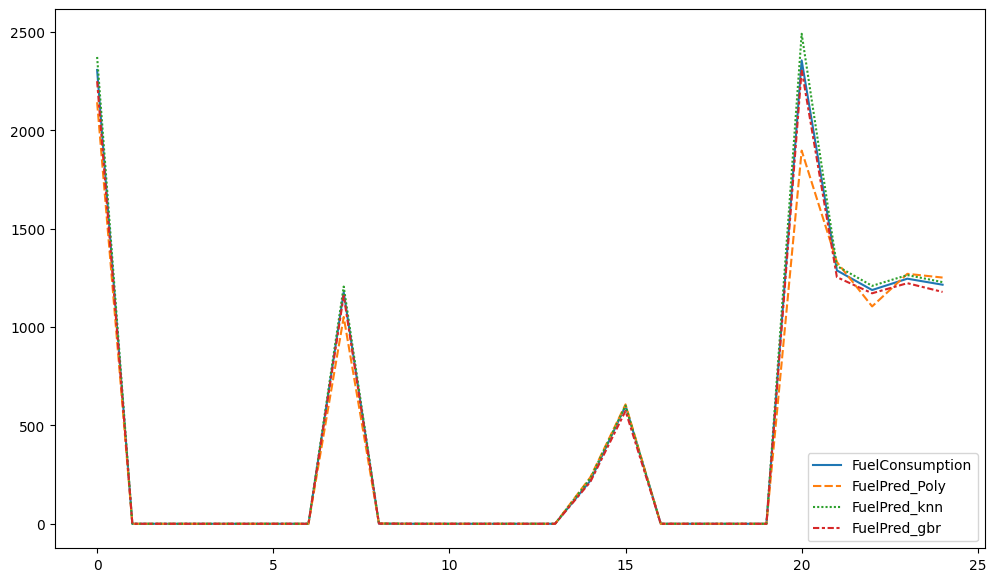

In [54]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_days_agu)

### Total fuel consumptions  & predictors with different algorithms calculate by weeks

In [55]:
df_weeks_aug = df_new_aug.groupby(pd.Grouper(key = 'timestamp', freq = 'W')).sum().reset_index()
df_weeks_aug

,timestamp,FuelConsumption,FuelPred_Poly,FuelPred_knn,FuelPred_gbr
0,2022-08-07,2306.730167,2142.594441,2372.701345,2249.629331
1,2022-08-14,1178.051875,1052.497210,1206.509484,1159.717856
2,2022-08-21,3173.135083,2739.407025,3322.119950,3093.872659
3,2022-08-28,4936.613858,4957.058296,5011.907303,4826.095512


In [56]:
mae_Poly_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_Poly)
mae_knn_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_knn)
mae_gbr_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_gbr)

print(f"Absolute Error (days) is:") 
print(f"{mae_Poly_weeks_aug:.2f} for model Polynormial") 
print(f"{mae_knn_weeks_aug:.2f} for model KNN")
print(f"{mae_gbr_weeks_aug:.2f} for decision gbr") 

Absolute Error (days) is:
185.97 for model Polynormial
79.68 for model KNN
66.30 for decision gbr


<AxesSubplot:>

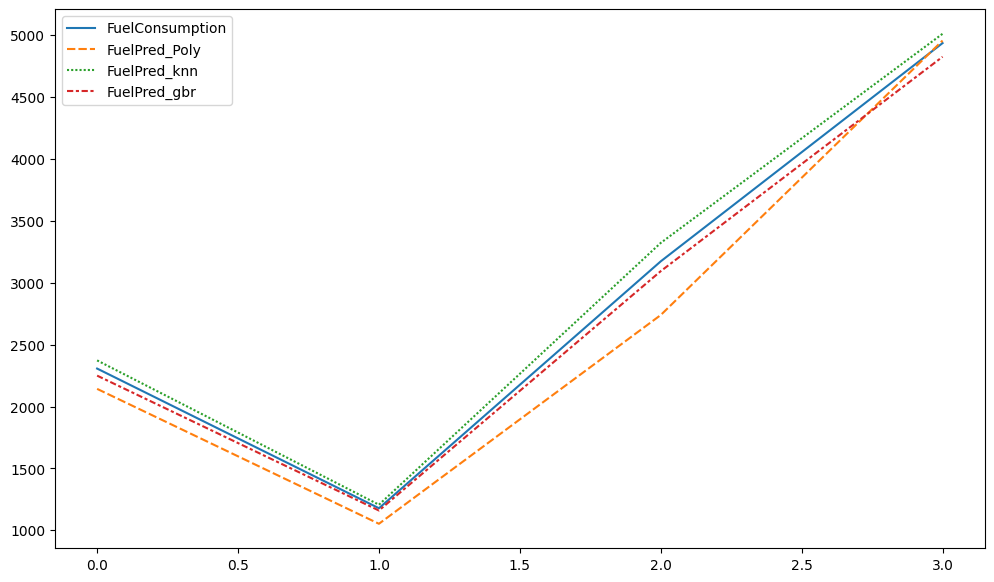

In [57]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_weeks_aug)

#### Accuracy for different models during time period

In [58]:
from sklearn import metrics

- Accuracy for days predictors

In [61]:
print(f"The coefficient of determination for Polynormial Regression: {metrics.r2_score(df_days_agu.FuelConsumption, df_days_agu.FuelPred_Poly):.7f}")
print(f"The coefficient of determination for KNN:                    {metrics.r2_score(df_days_agu.FuelConsumption, df_days_agu.FuelPred_knn):.7f}")
print(f"The coefficient of determination for gbr:                    {metrics.r2_score(df_days_agu.FuelConsumption, df_days_agu.FuelPred_gbr):.7f}")

The coefficient of determination for Polynormial Regression: 0.9802566
The coefficient of determination for KNN:                    0.9981260
The coefficient of determination for gbr:                    0.9992612


- Accuracy for weeks predictors

In [62]:
print(f"The coefficient of determination for Polynormial Regression: {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_Poly):.7f}")
print(f"The coefficient of determination for KNN:                    {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_knn):.7f}")
print(f"The coefficient of determination for gbr:                    {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_gbr):.7f}")

The coefficient of determination for Polynormial Regression: 0.9693291
The coefficient of determination for KNN:                    0.9956194
The coefficient of determination for gbr:                    0.9970696
